In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import math as m

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
dataset_url = '/content/gdrive/My Drive/case_studies/UT_Data_Complex/new_df.csv'
data = pd.read_csv(dataset_url)


In [4]:
data.head()

Unnamed: 0     acc_X   acc_Y  ...    gjerky    gjerkz   mag_gjerk
0           0 -5.924900 -10.978  ... -115.4855 -119.7770  169.792790
1           1 -6.960000 -12.136  ...  -81.6415  -68.4160  117.277229
2           2 -3.963500 -15.568  ...  -23.1500  -98.4860  108.150660
3           3 -0.054481 -15.677  ...   16.9050  -92.4715   94.004156
4           4  0.354130 -13.048  ...  -77.1685  -53.4515  100.718867

[5 rows x 35 columns]

In [0]:
data.drop('Unnamed: 0', 1, inplace=True)

In [6]:
data.head(2)

acc_X   acc_Y    acc_Z  linearacc_X  ...  gjerkx    gjerky   gjerkz   mag_gjerk
0 -5.9249 -10.978  1.00790      -5.3538  ...  33.855 -115.4855 -119.777  169.792790
1 -6.9600 -12.136  0.28603      -5.4353  ...  49.070  -81.6415  -68.416  117.277229

[2 rows x 34 columns]

In [7]:
data[89999:179999].head(5)

acc_X   acc_Y     acc_Z  ...   gjerky   gjerkz  mag_gjerk
89999 -1.4438 -9.8748 -0.245170  ...  27.5655  22.4800  35.571966
90000 -1.3757 -9.7385 -0.027241  ...  23.0910  20.1435  30.822672
90001 -1.4846 -9.6841 -0.136200  ...  19.4710  17.2415  26.212063
90002 -1.5800 -9.5887 -0.122580  ...  21.6245  13.4845  25.677774
90003 -1.3484 -9.6296 -0.108960  ...  21.2430  11.0875  24.008146

[5 rows x 34 columns]

In [0]:
from scipy import signal
L=5 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = np.ones(1)  #denominator co-effs of filter transfer function
x = np.random.randn(10) #10 random samples for x
y = signal.convolve(x,b) #filter output using convolution
 
y = signal.lfilter(b,a,x) #filter output using lfilter function

In [9]:
y

array([ 0.07991478,  0.42376128,  0.17708038,  0.01610647,  0.05401391,
       -0.05873178, -0.61582661, -0.17609488,  0.2739281 ,  0.53519906])

In [10]:
print(b,a,x)

[0.2 0.2 0.2 0.2 0.2] [1.] [ 0.3995739   1.71923249 -1.23340449 -0.80486952  0.18953717 -0.16415453
 -1.06624168  0.96525418  1.44524537  1.49589199]


In [0]:
y = signal.convolve(x,b) #filter output using convolution


In [0]:
x = data[89999:179999]['mag_acc'].tolist()

In [13]:
len(x)

90000

In [0]:
from scipy import signal
L=900 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = np.ones(1)  #denominator co-effs of filter transfer function
#x = np.random.randn(10) #10 random samples for x
#y = signal.convolve(x,b) #filter output using convolution
 
y = signal.lfilter(b,a,x) #filter output using lfilter function

In [15]:
len(y)

90000

In [16]:
print(x)

[9.982802302404874, 9.83522622068659, 9.798182505444569, 9.71877531103585, 9.724158112741687, 9.771792730307986, 9.768785376498963, 9.512236034440065, 9.7801842396961, 9.945450965084492, 9.956860096785732, 10.038133379134788, 9.972691265254381, 9.905798305356313, 10.231824063386744, 10.2831645763792, 10.34148077455545, 10.410366912739628, 10.315407130010136, 9.907431712819475, 9.748904943786302, 9.657734165864163, 9.451612529616307, 9.459715334850197, 9.509788151129396, 9.753206153843003, 9.930569222323614, 9.930569222323614, 9.930569222323614, 10.110058238198288, 10.15042525210151, 10.13738150093011, 10.08445405083488, 10.098859574630195, 9.971298352075321, 9.946687232948467, 9.964933480906934, 9.808043226459596, 9.641200605754449, 9.672396613502778, 9.830312929530779, 9.91863751010692, 10.012789185956127, 10.042307776721444, 9.898489030922043, 9.780344763764722, 9.796004590796187, 9.791551067369255, 9.81163796468765, 9.846680253616649, 9.82638027664923, 9.837462603299745, 9.832296148

In [17]:
print(y)

[0.011092   0.02202003 0.0329069  ... 9.99702228 9.99709693 9.99712187]


# EDA

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

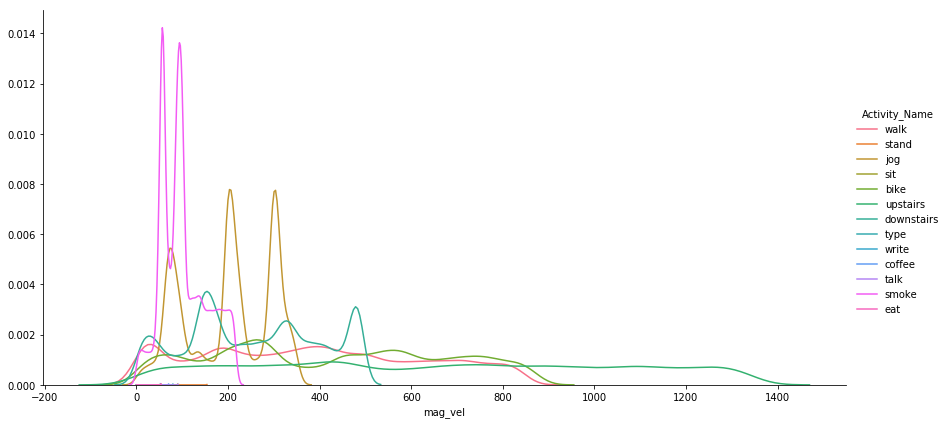

In [0]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(data, hue='Activity_Name', size=6,aspect=2)
facetgrid.map(sns.distplot,'mag_vel', hist=False)\
    .add_legend()

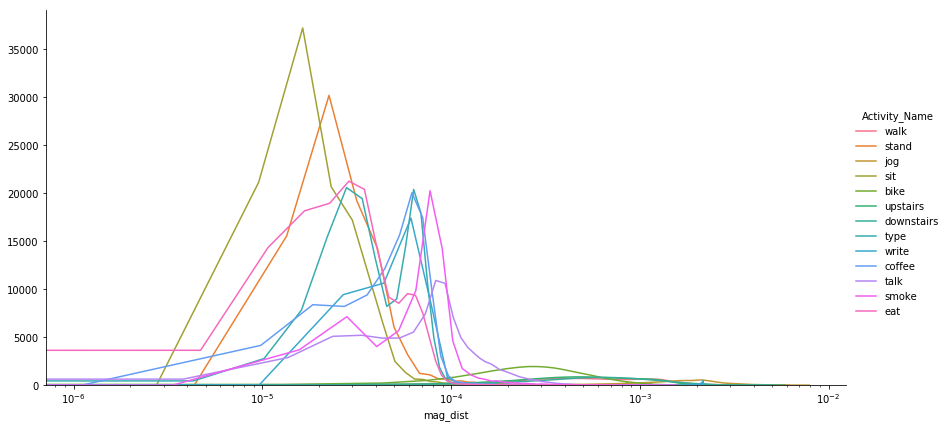

In [0]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(data, hue='Activity_Name', size=6,aspect=2)
facetgrid.map(sns.distplot,'mag_dist', hist=False)\
    .add_legend()
plt.xscale('log')

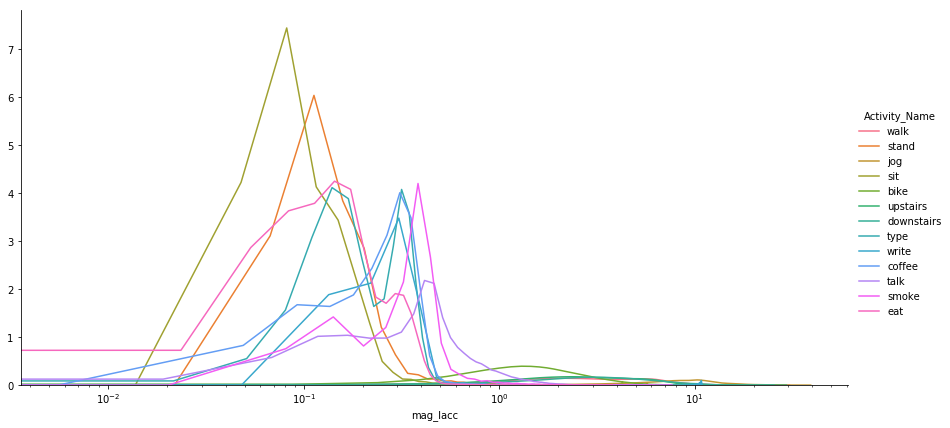

In [0]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(data, hue='Activity_Name', size=6,aspect=2)
facetgrid.map(sns.distplot,'mag_lacc', hist=False)\
    .add_legend()
plt.xscale('log')

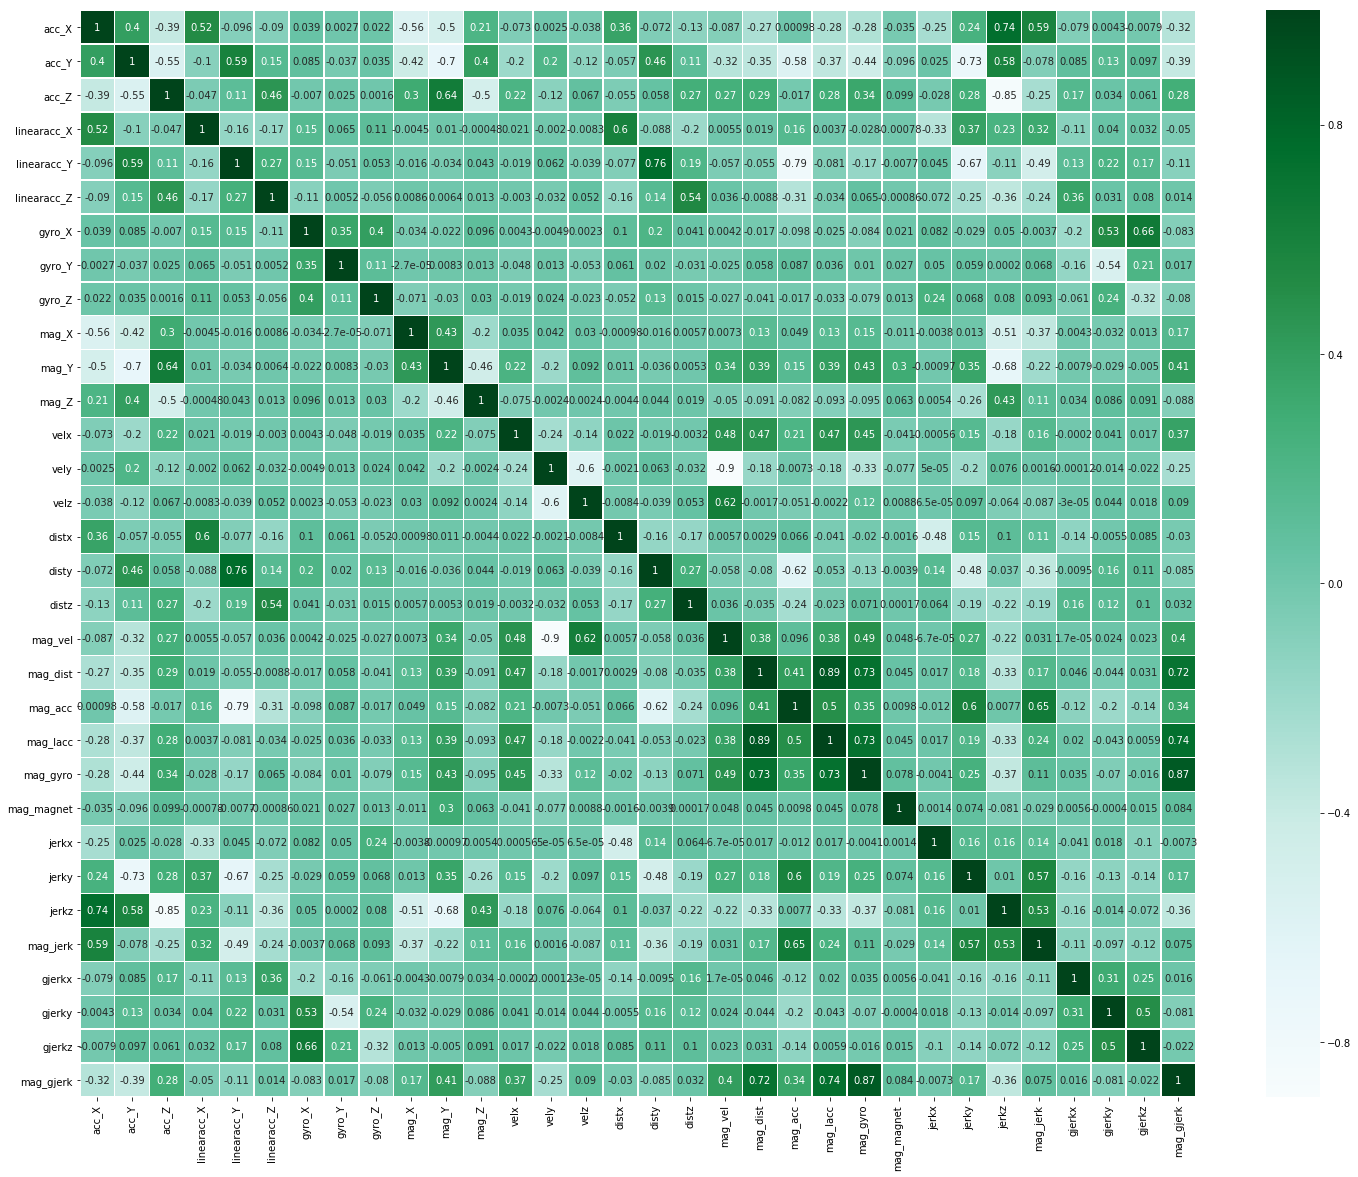

In [0]:
fig, ax = plt.subplots(figsize=(25,20))         # Sample figsize in inches
sns.heatmap(data.corr(), cmap='BuGn', annot=True, linewidths=.5, ax=ax)

In [0]:
len(data)

1169999

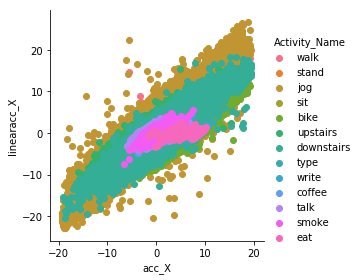

In [18]:
sns.FacetGrid(data, hue="Activity_Name", size=4) \
   .map(plt.scatter, "acc_X", "linearacc_X") \
   .add_legend();
plt.show();

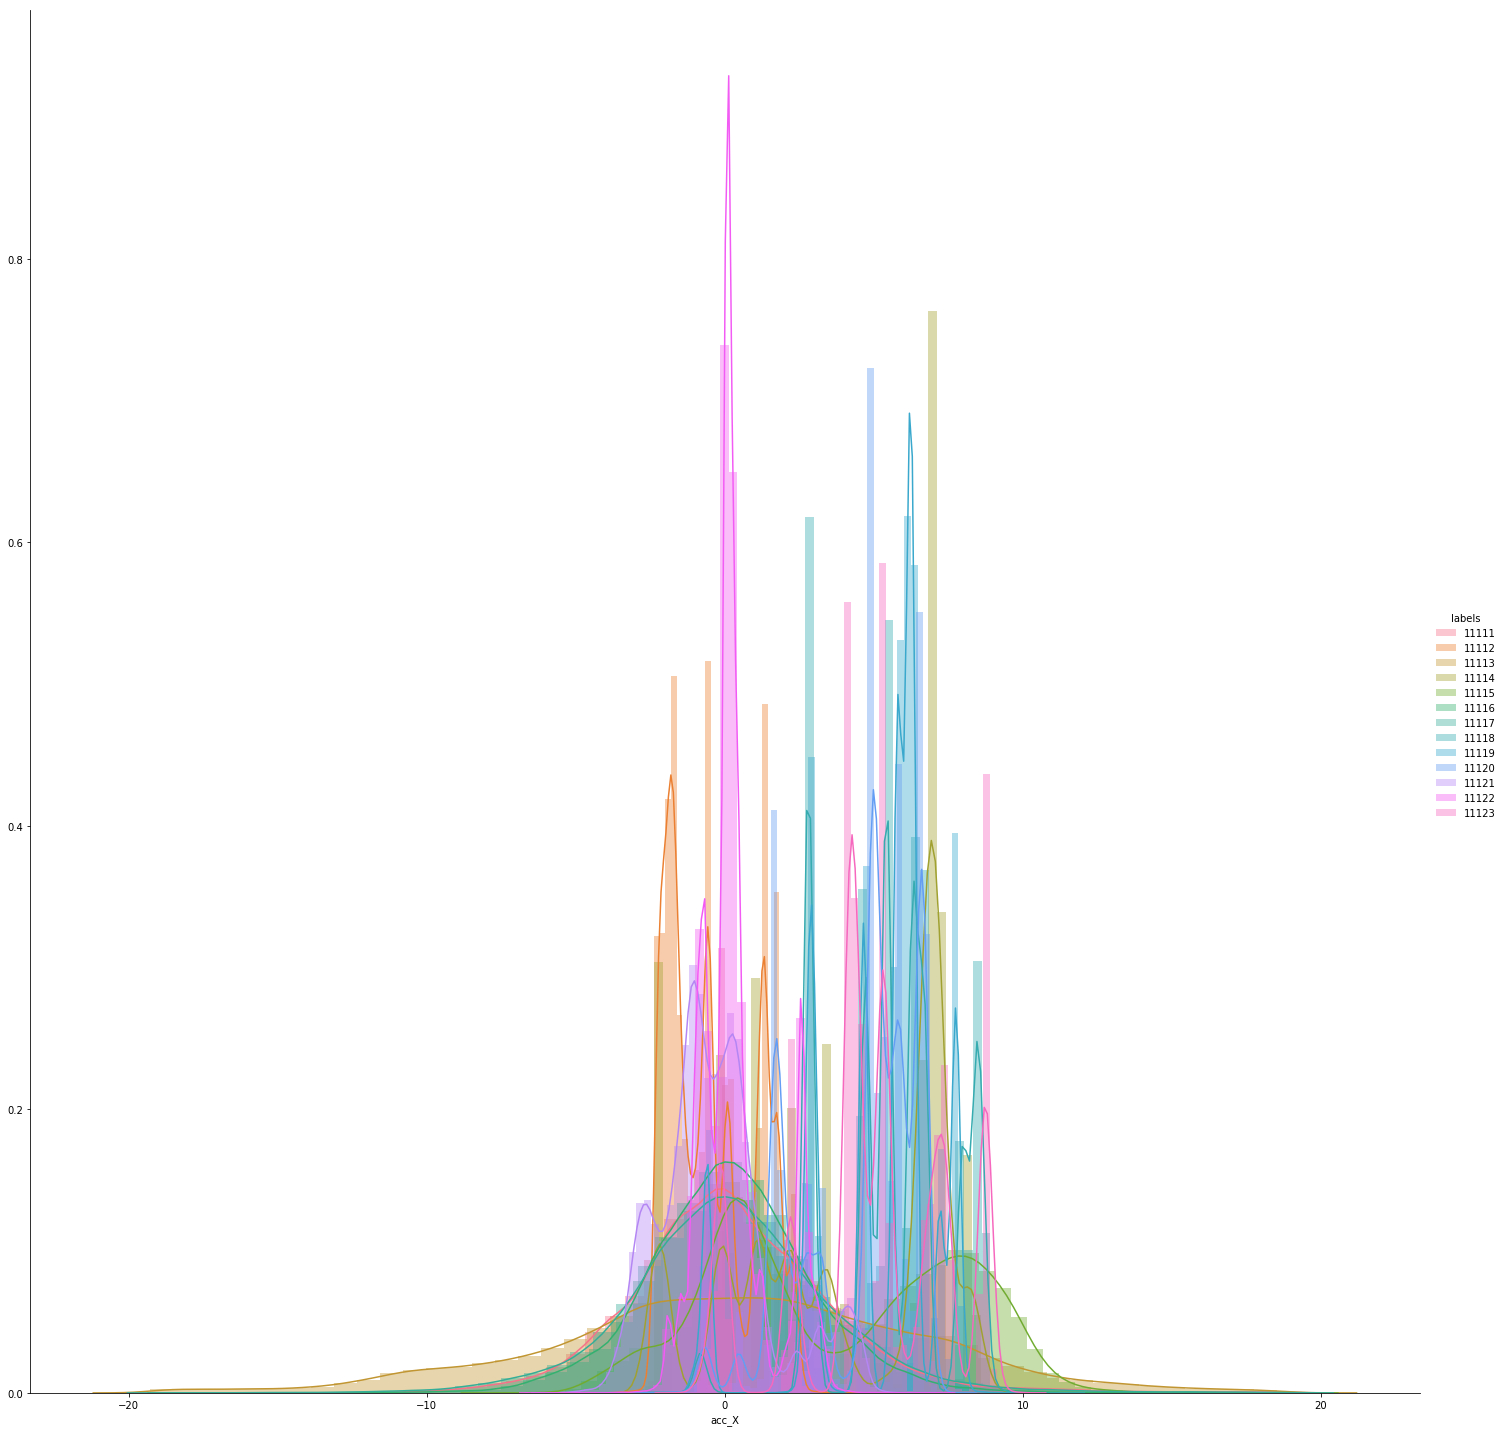

In [19]:
sns.FacetGrid(data, hue="labels", size=20) \
   .map(sns.distplot, "acc_X") \
   .add_legend();
plt.show();

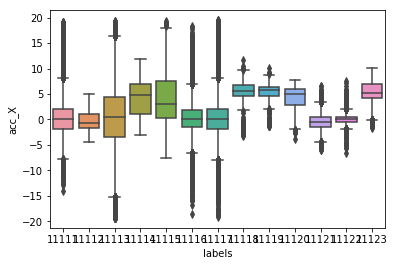

In [20]:
sns.boxplot(x='labels',y='acc_X', data=data)
plt.show()

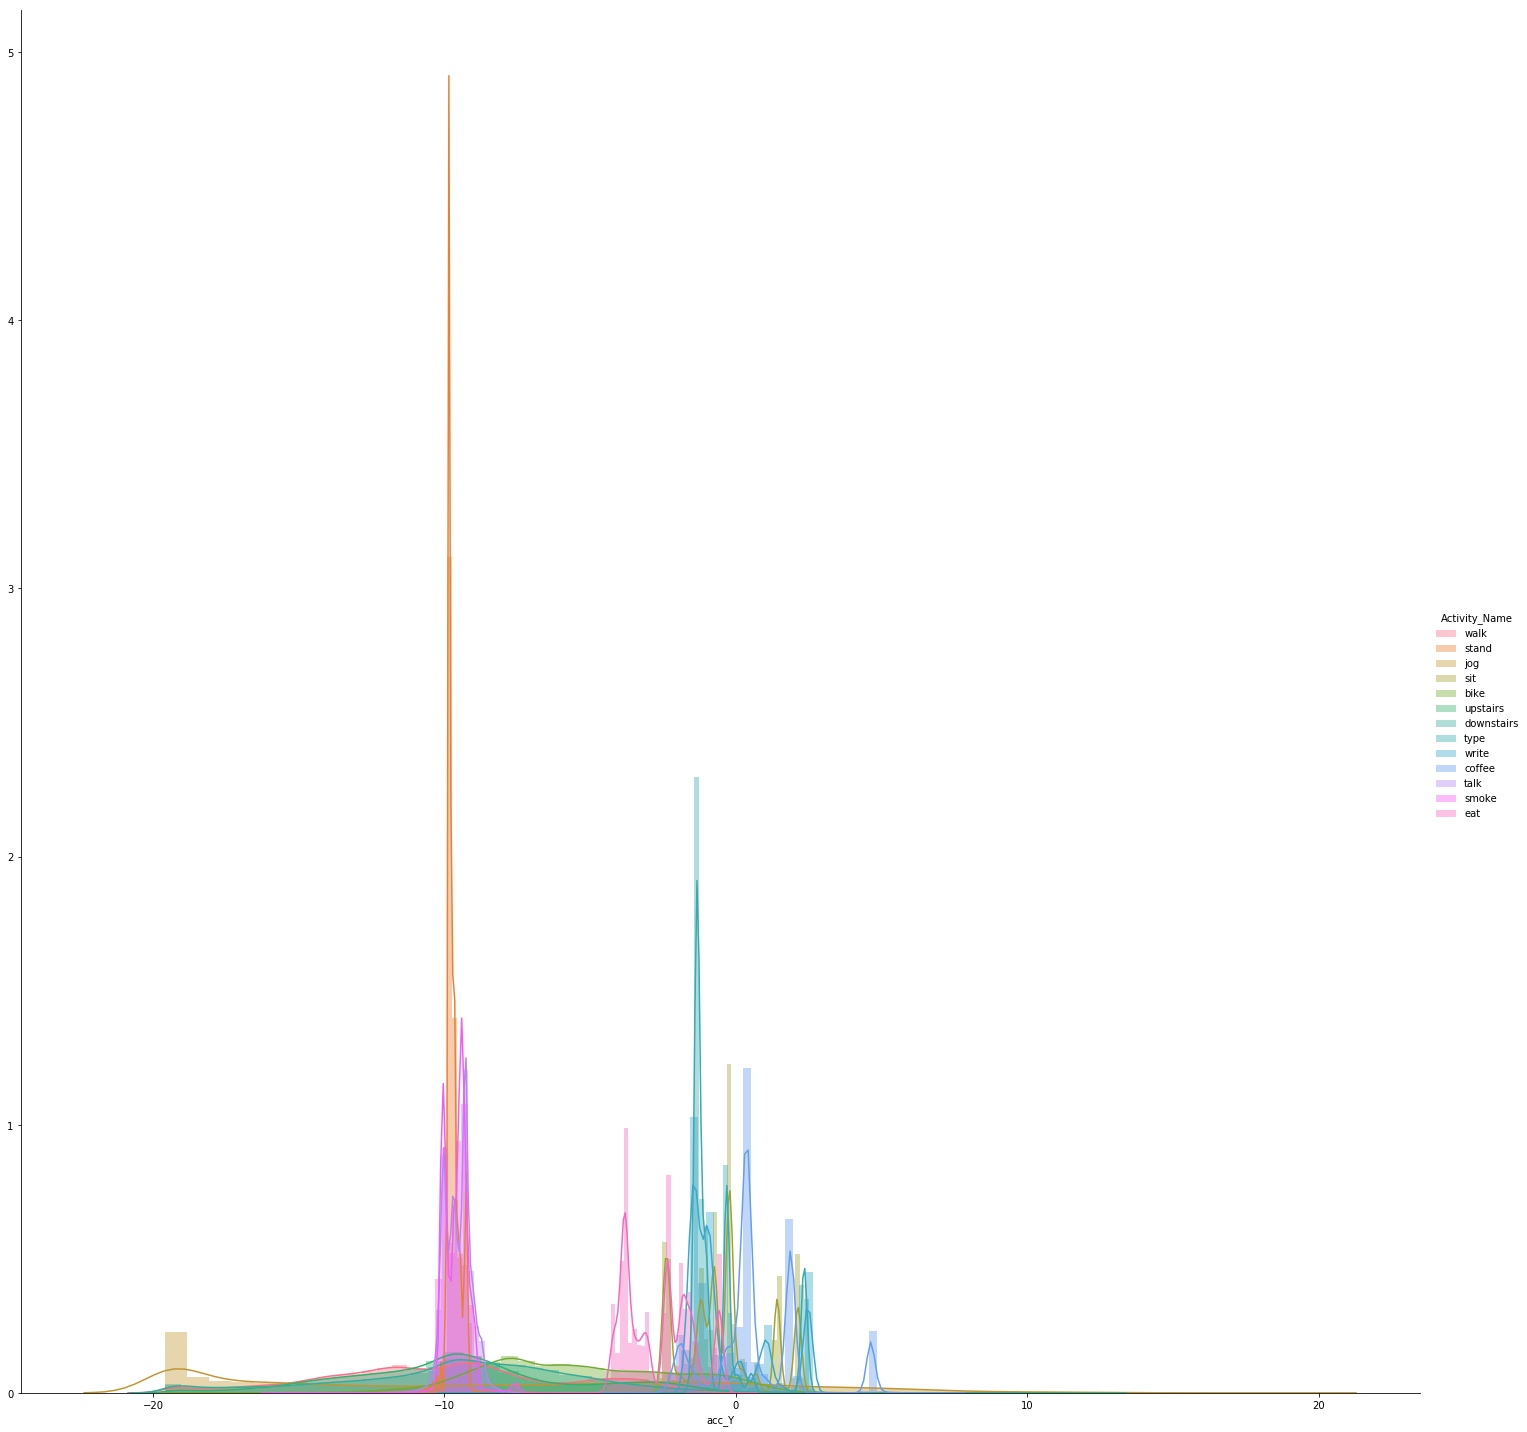

In [21]:
sns.FacetGrid(data, hue="Activity_Name", size=20) \
   .map(sns.distplot, "acc_Y") \
   .add_legend();
plt.show();

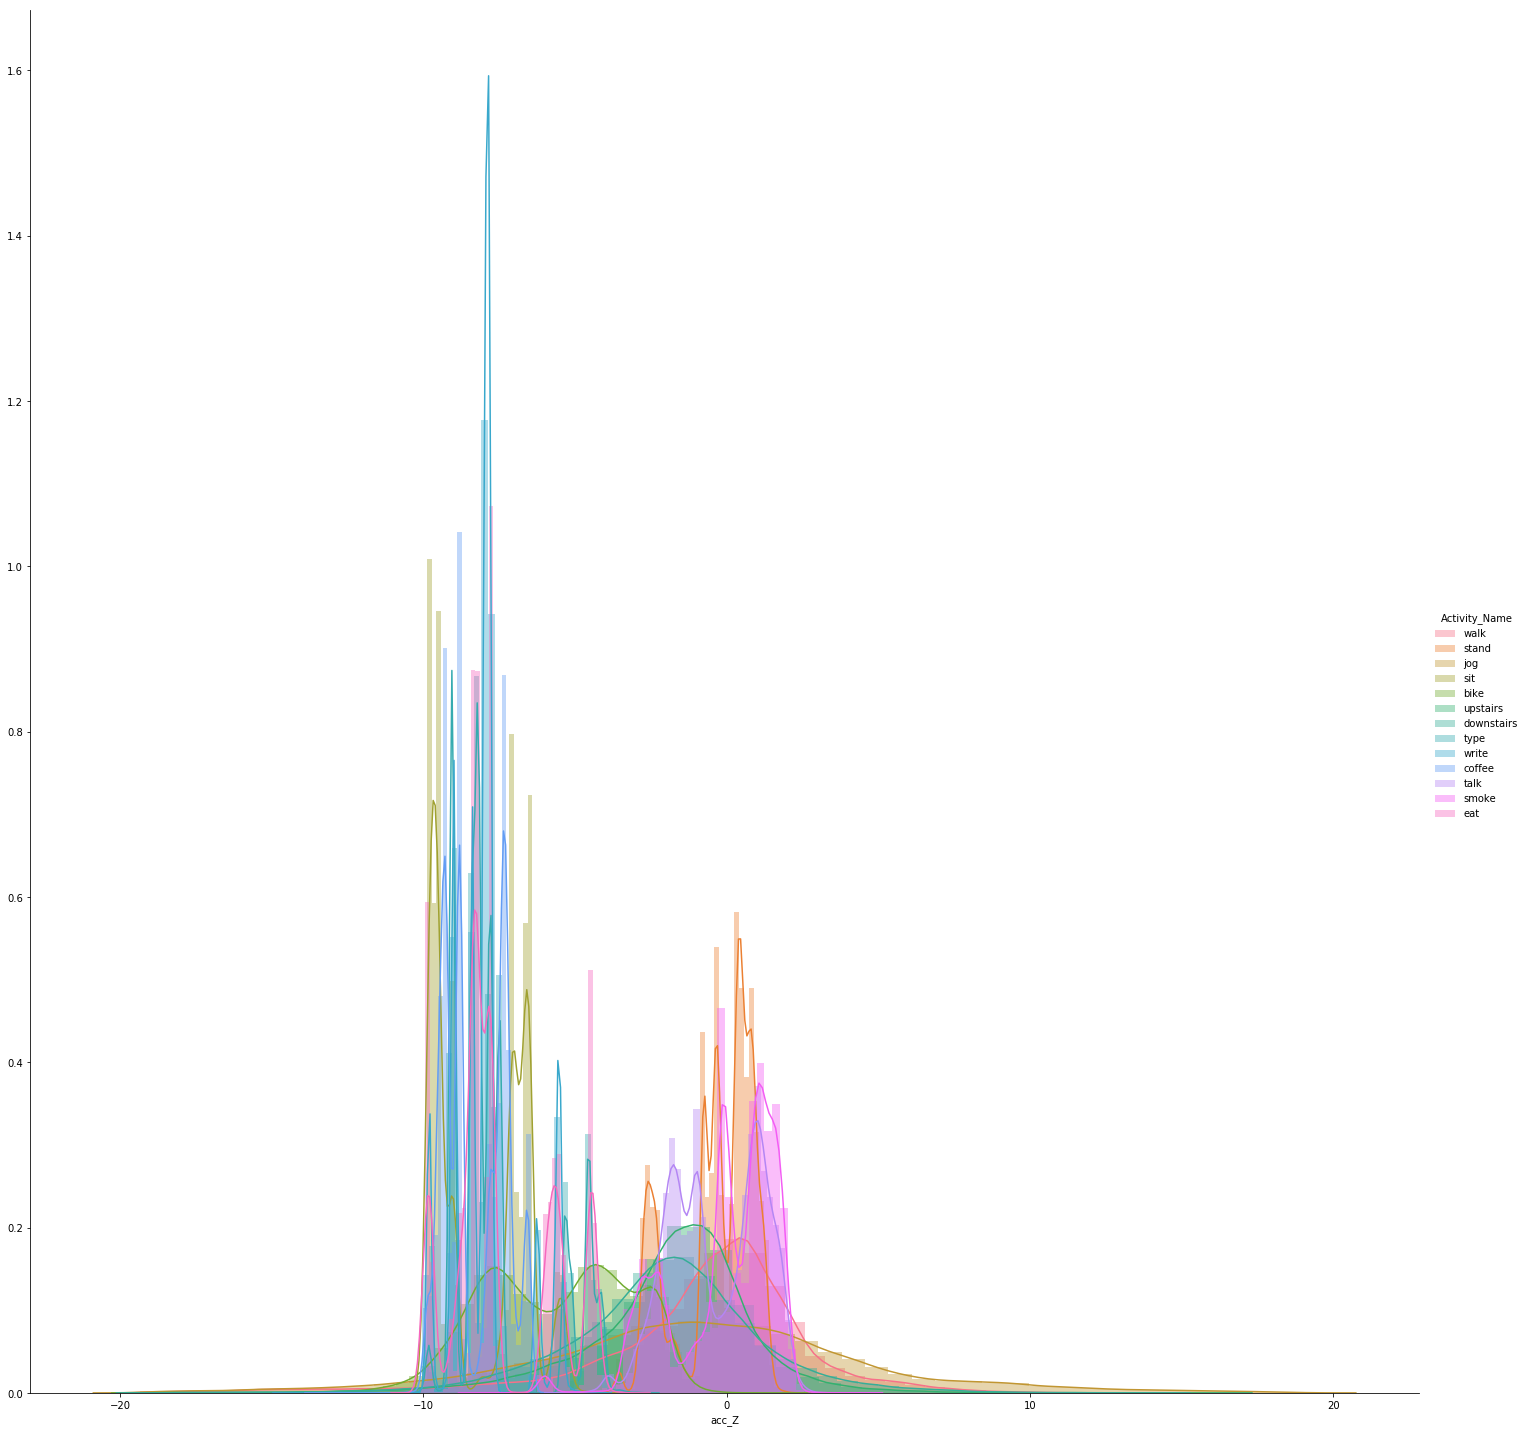

In [23]:
sns.FacetGrid(data, hue="Activity_Name", size=20) \
   .map(sns.distplot, "acc_Z") \
   .add_legend();
plt.show();

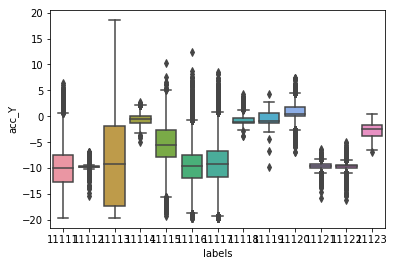

In [24]:
sns.boxplot(x='labels',y='acc_Y', data=data)
plt.show()

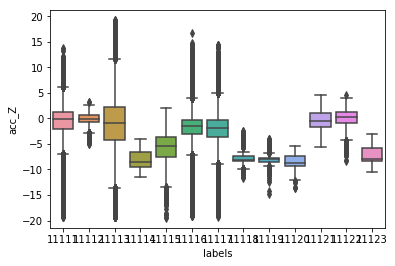

In [25]:
sns.boxplot(x='labels',y='acc_Z', data=data)
plt.show()

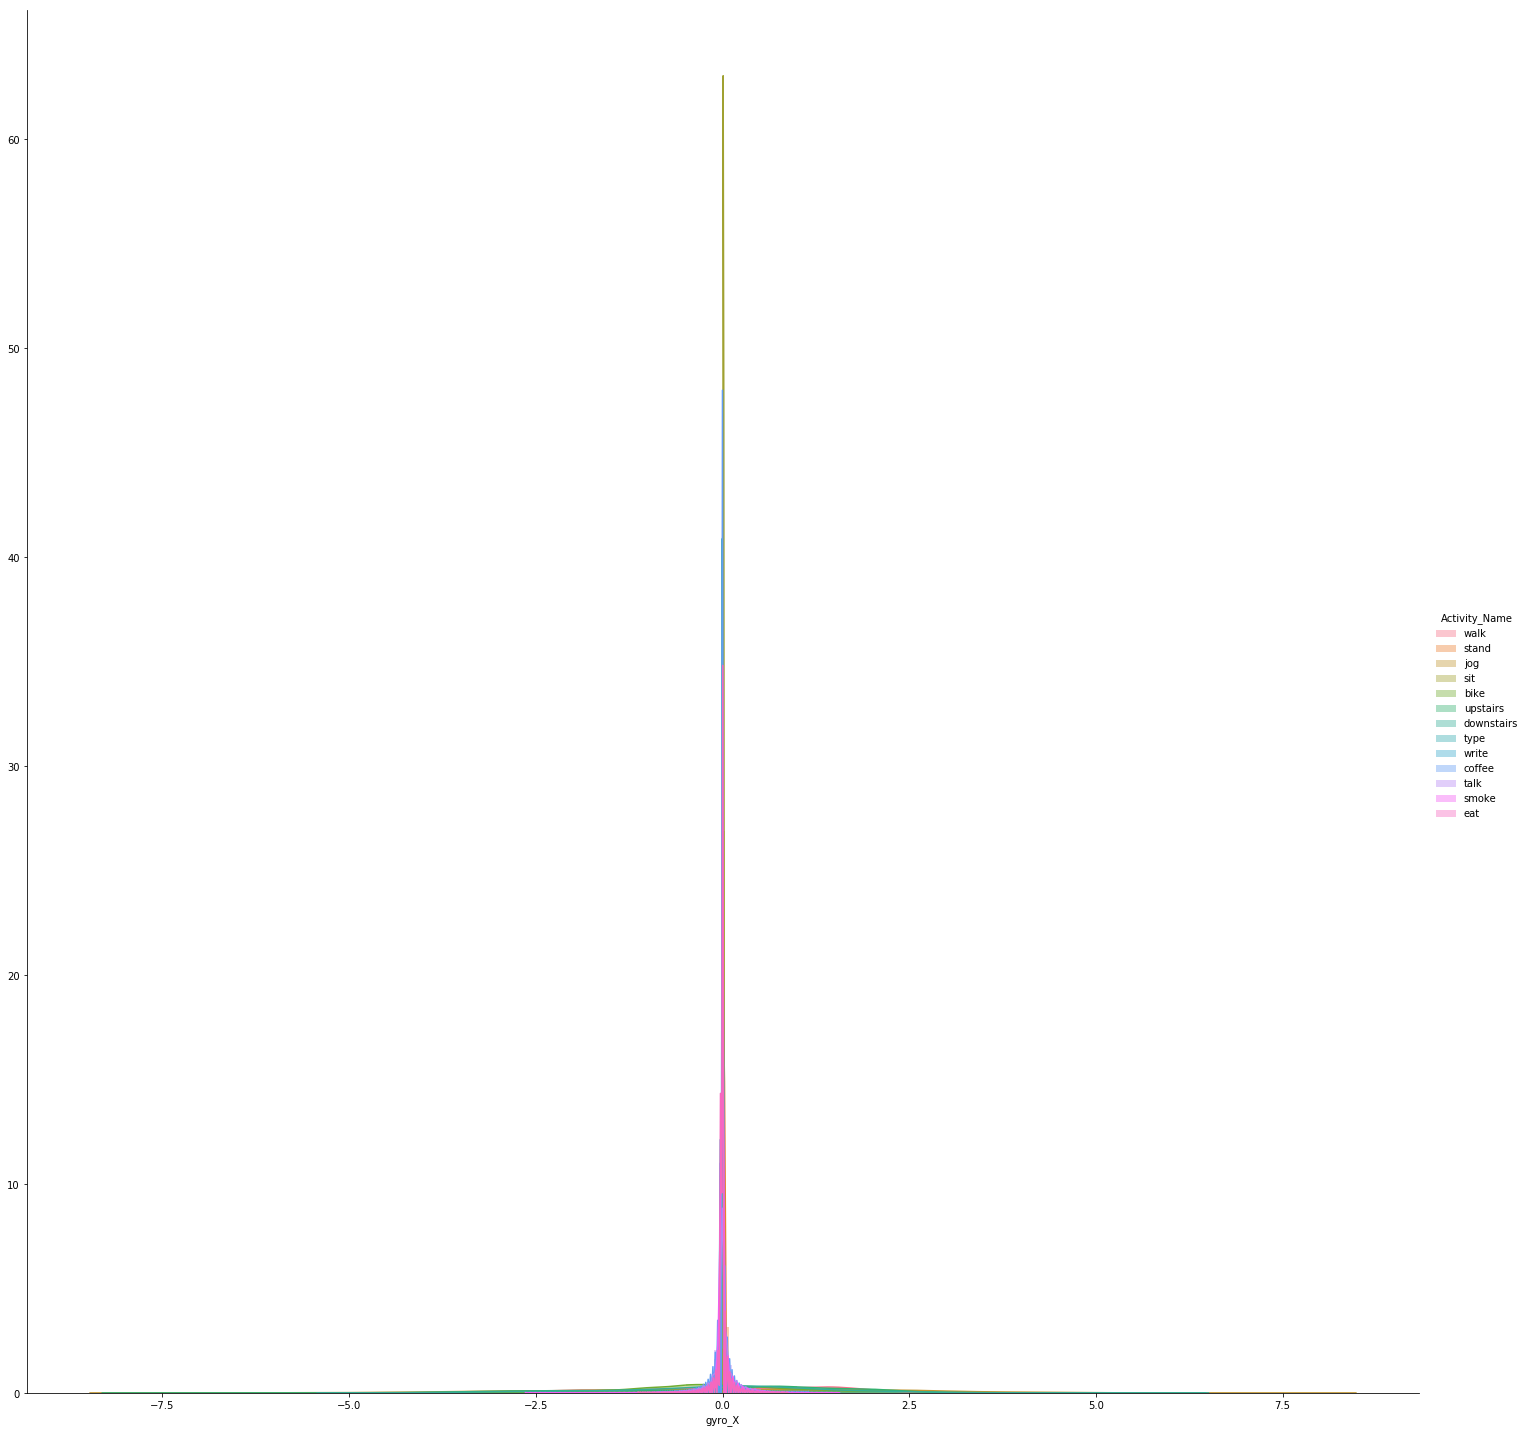

In [26]:
sns.FacetGrid(data, hue="Activity_Name", size=20) \
   .map(sns.distplot, "gyro_X") \
   .add_legend();
plt.show();


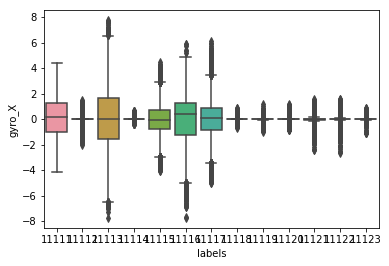

In [27]:
sns.boxplot(x='labels',y='gyro_X', data=data)
plt.show()

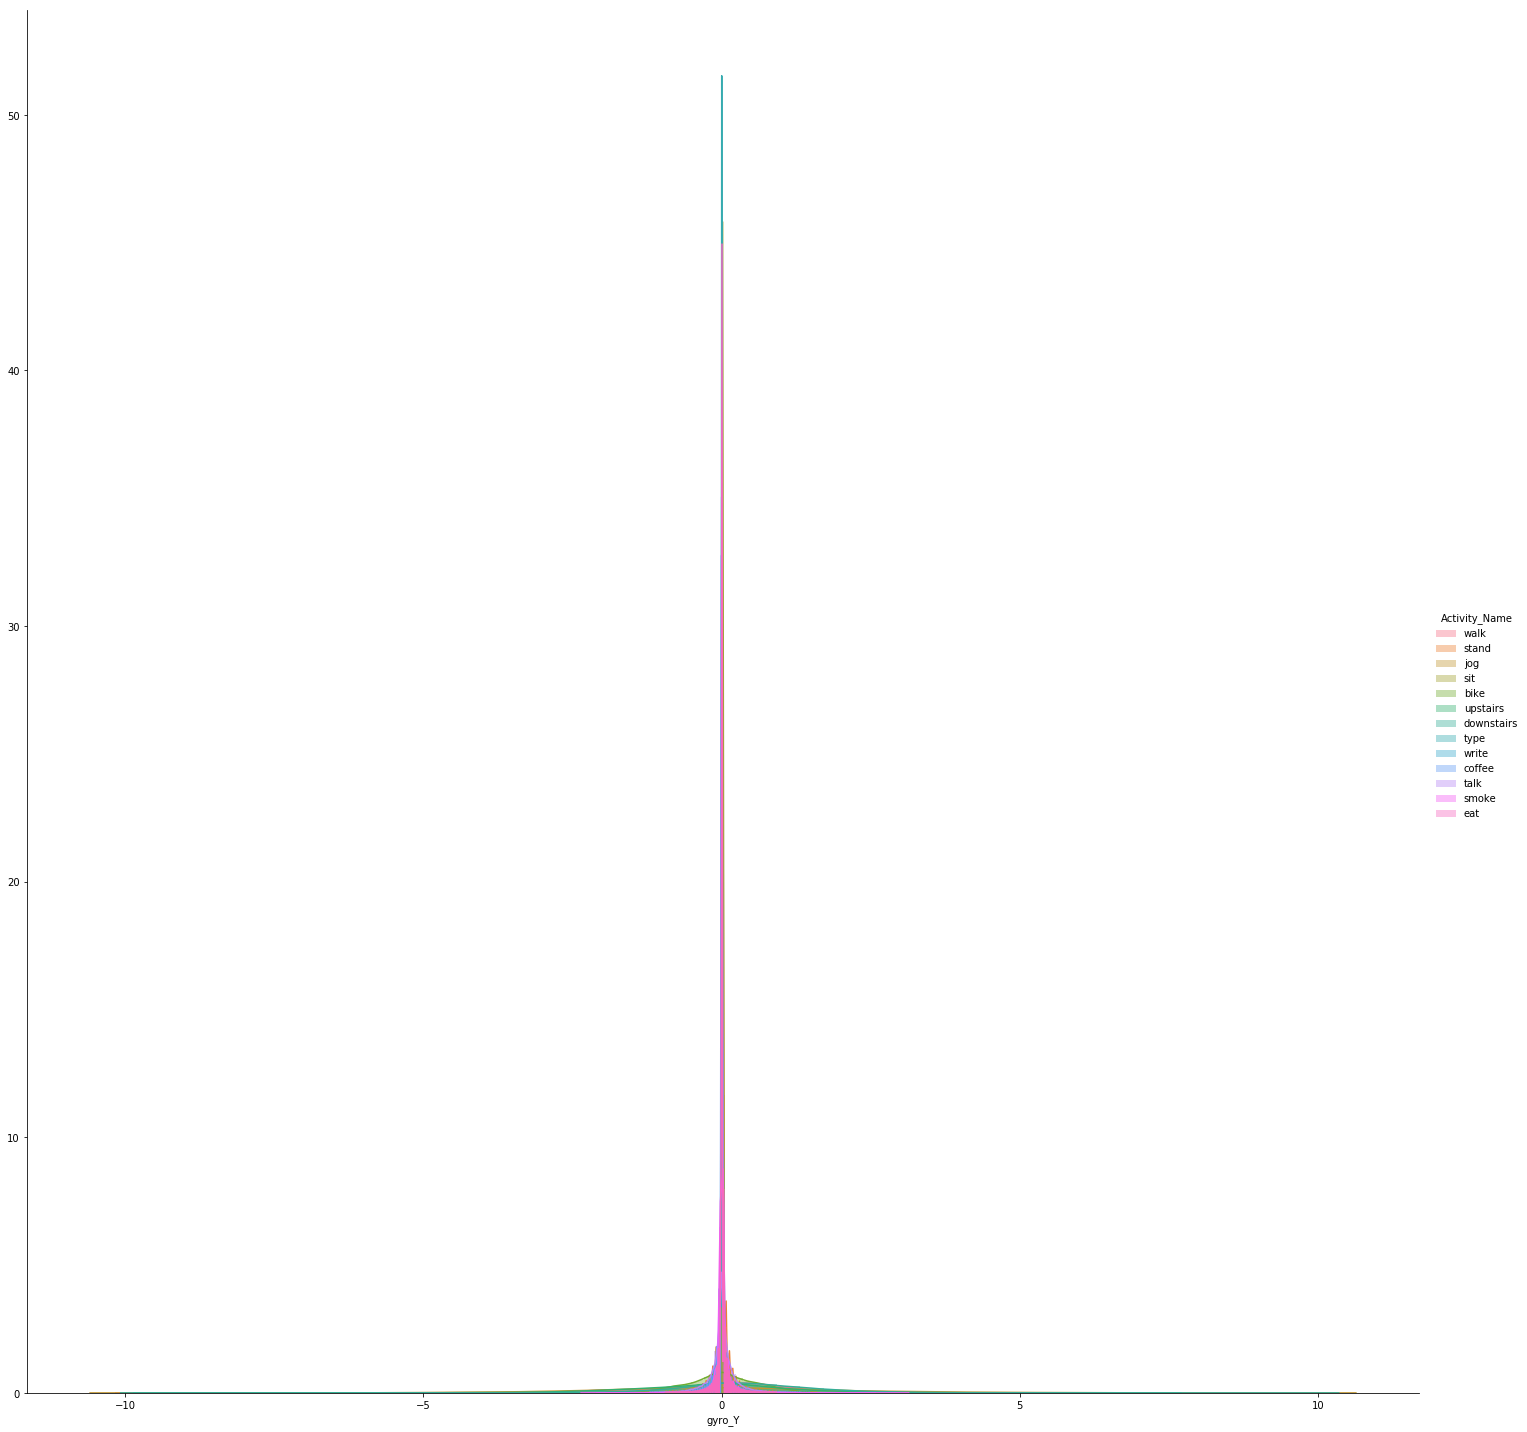

In [28]:
sns.FacetGrid(data, hue="Activity_Name", size=20) \
   .map(sns.distplot, "gyro_Y") \
   .add_legend();
plt.show();


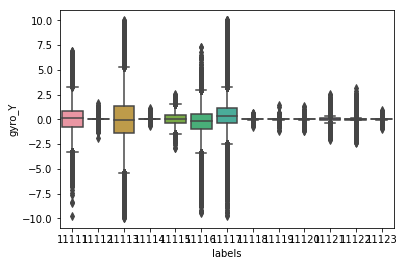

In [29]:
sns.boxplot(x='labels',y='gyro_Y', data=data)
plt.show()

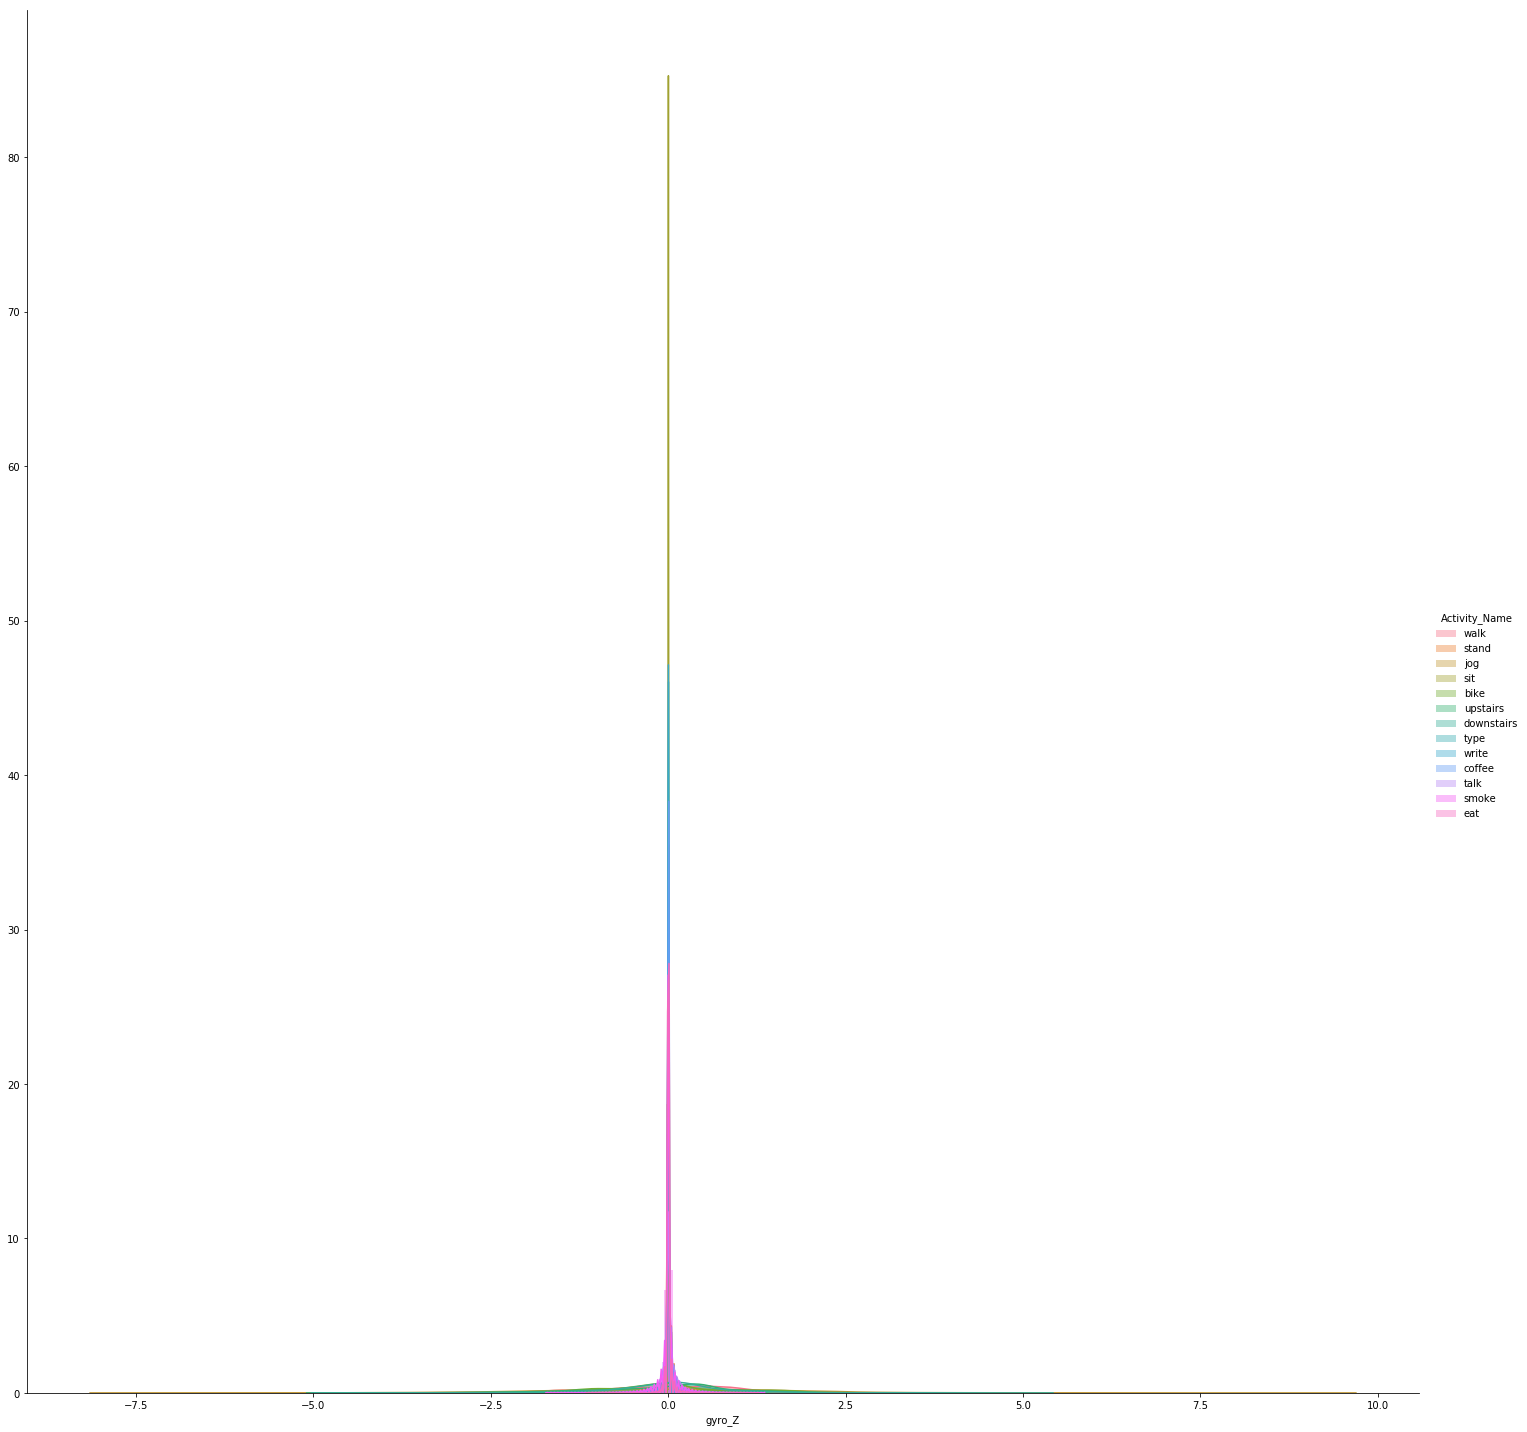

In [30]:
sns.FacetGrid(data, hue="Activity_Name", size=20) \
   .map(sns.distplot, "gyro_Z") \
   .add_legend();
plt.show();


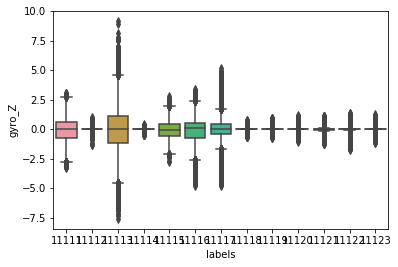

In [31]:
sns.boxplot(x='labels',y='gyro_Z', data=data)
plt.show()

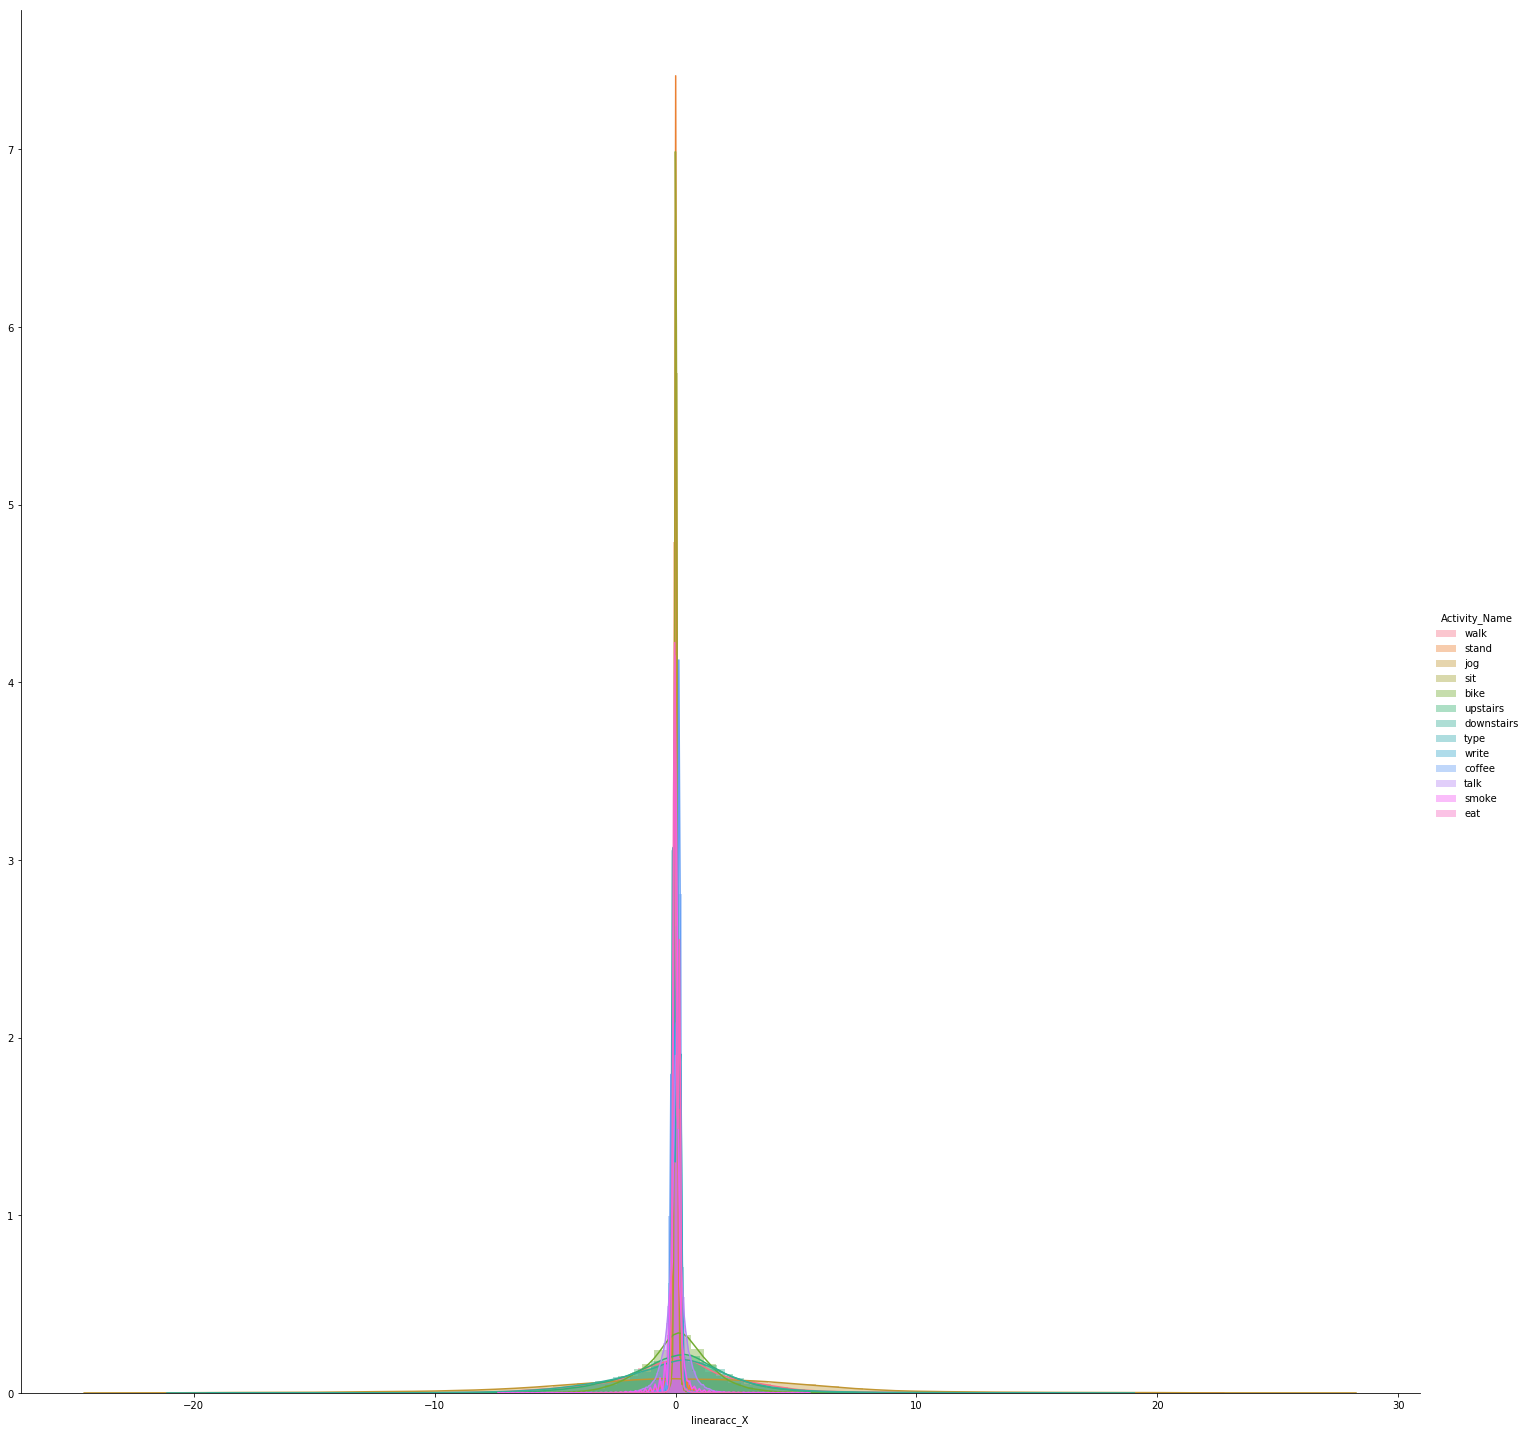

In [32]:
sns.FacetGrid(data, hue="Activity_Name", size=20) \
   .map(sns.distplot, "linearacc_X") \
   .add_legend();
plt.show();


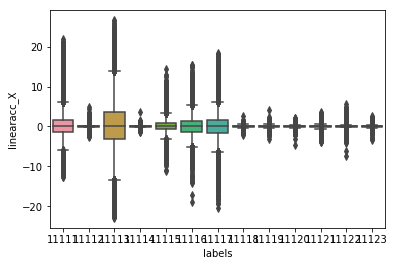

In [33]:
sns.boxplot(x='labels',y='linearacc_X', data=data)
plt.show()

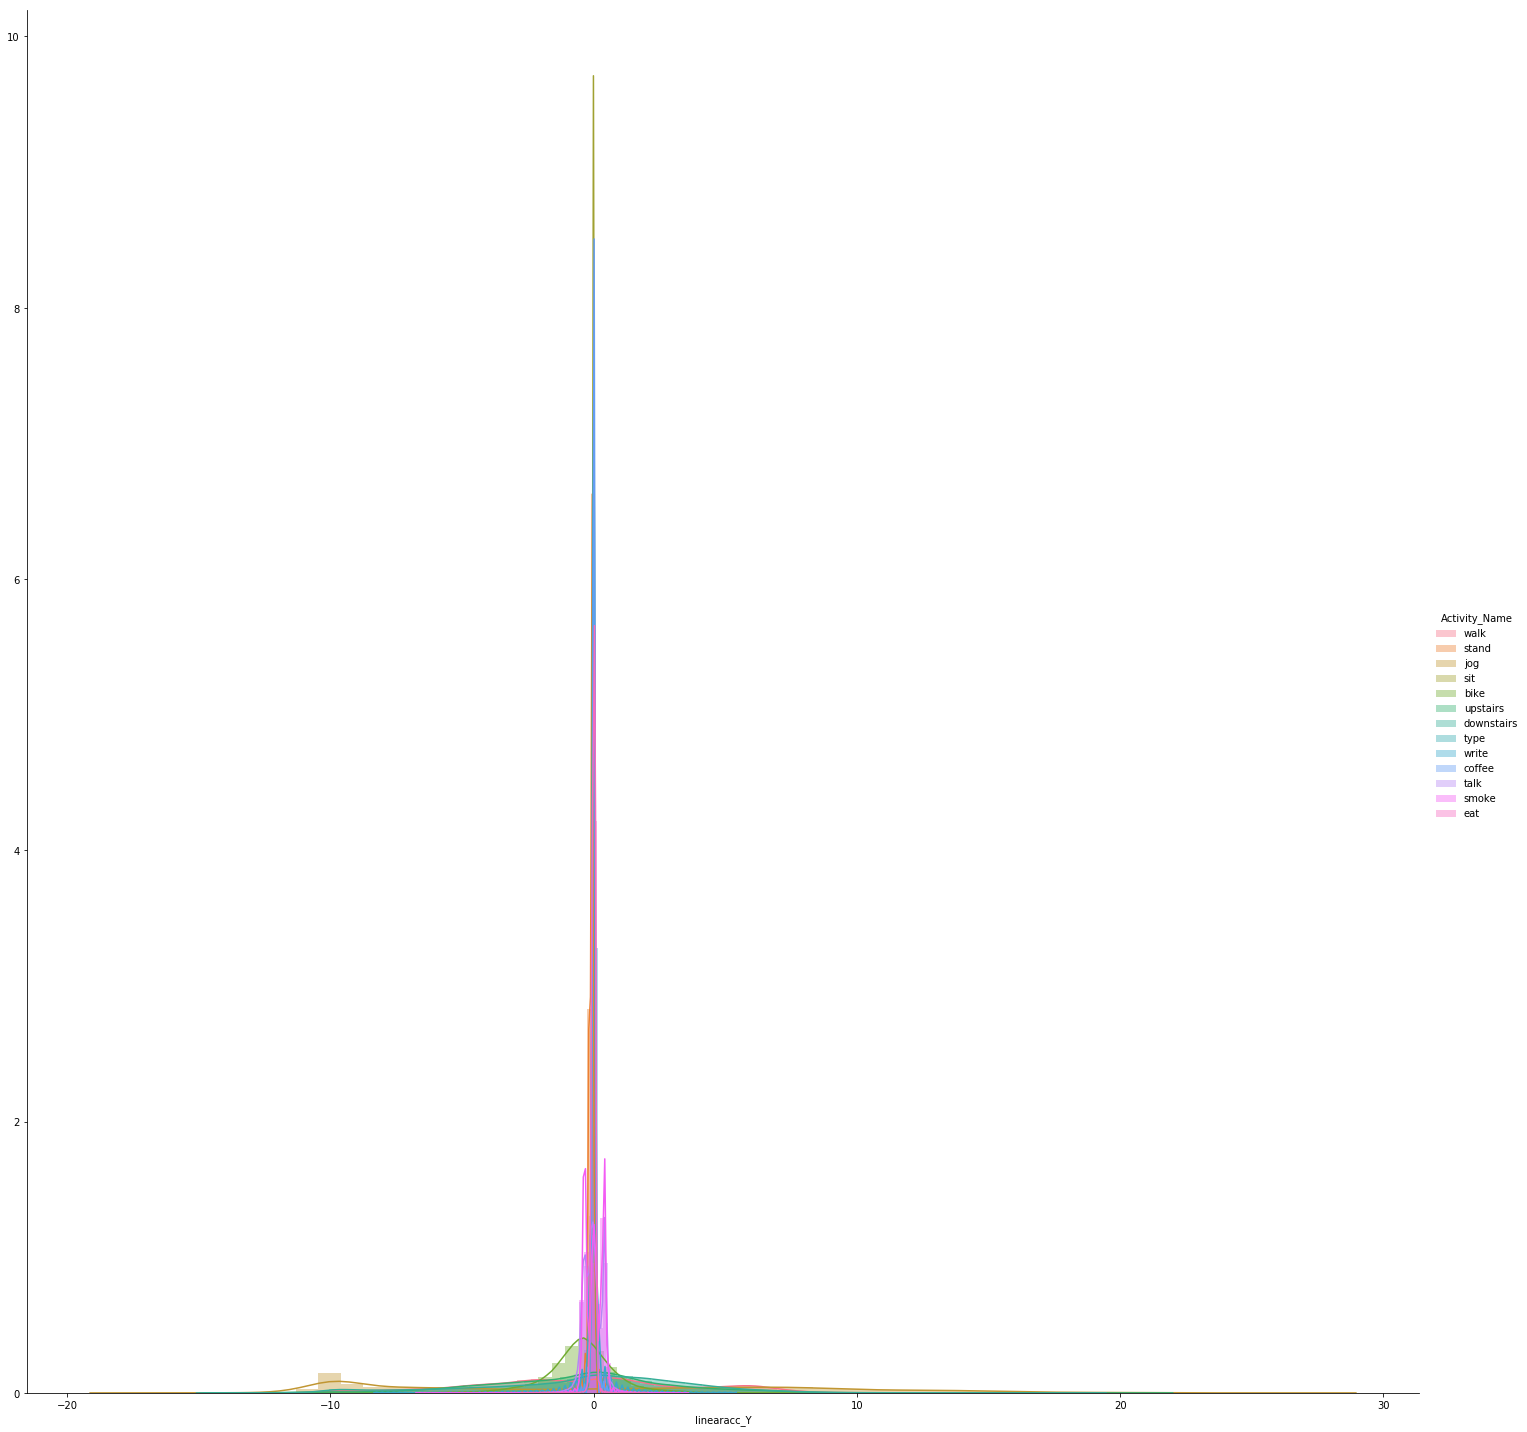

In [34]:
sns.FacetGrid(data, hue="Activity_Name", size=20) \
   .map(sns.distplot, "linearacc_Y") \
   .add_legend();
plt.show();


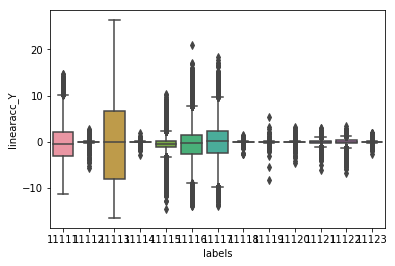

In [35]:
sns.boxplot(x='labels',y='linearacc_Y', data=data)
plt.show()

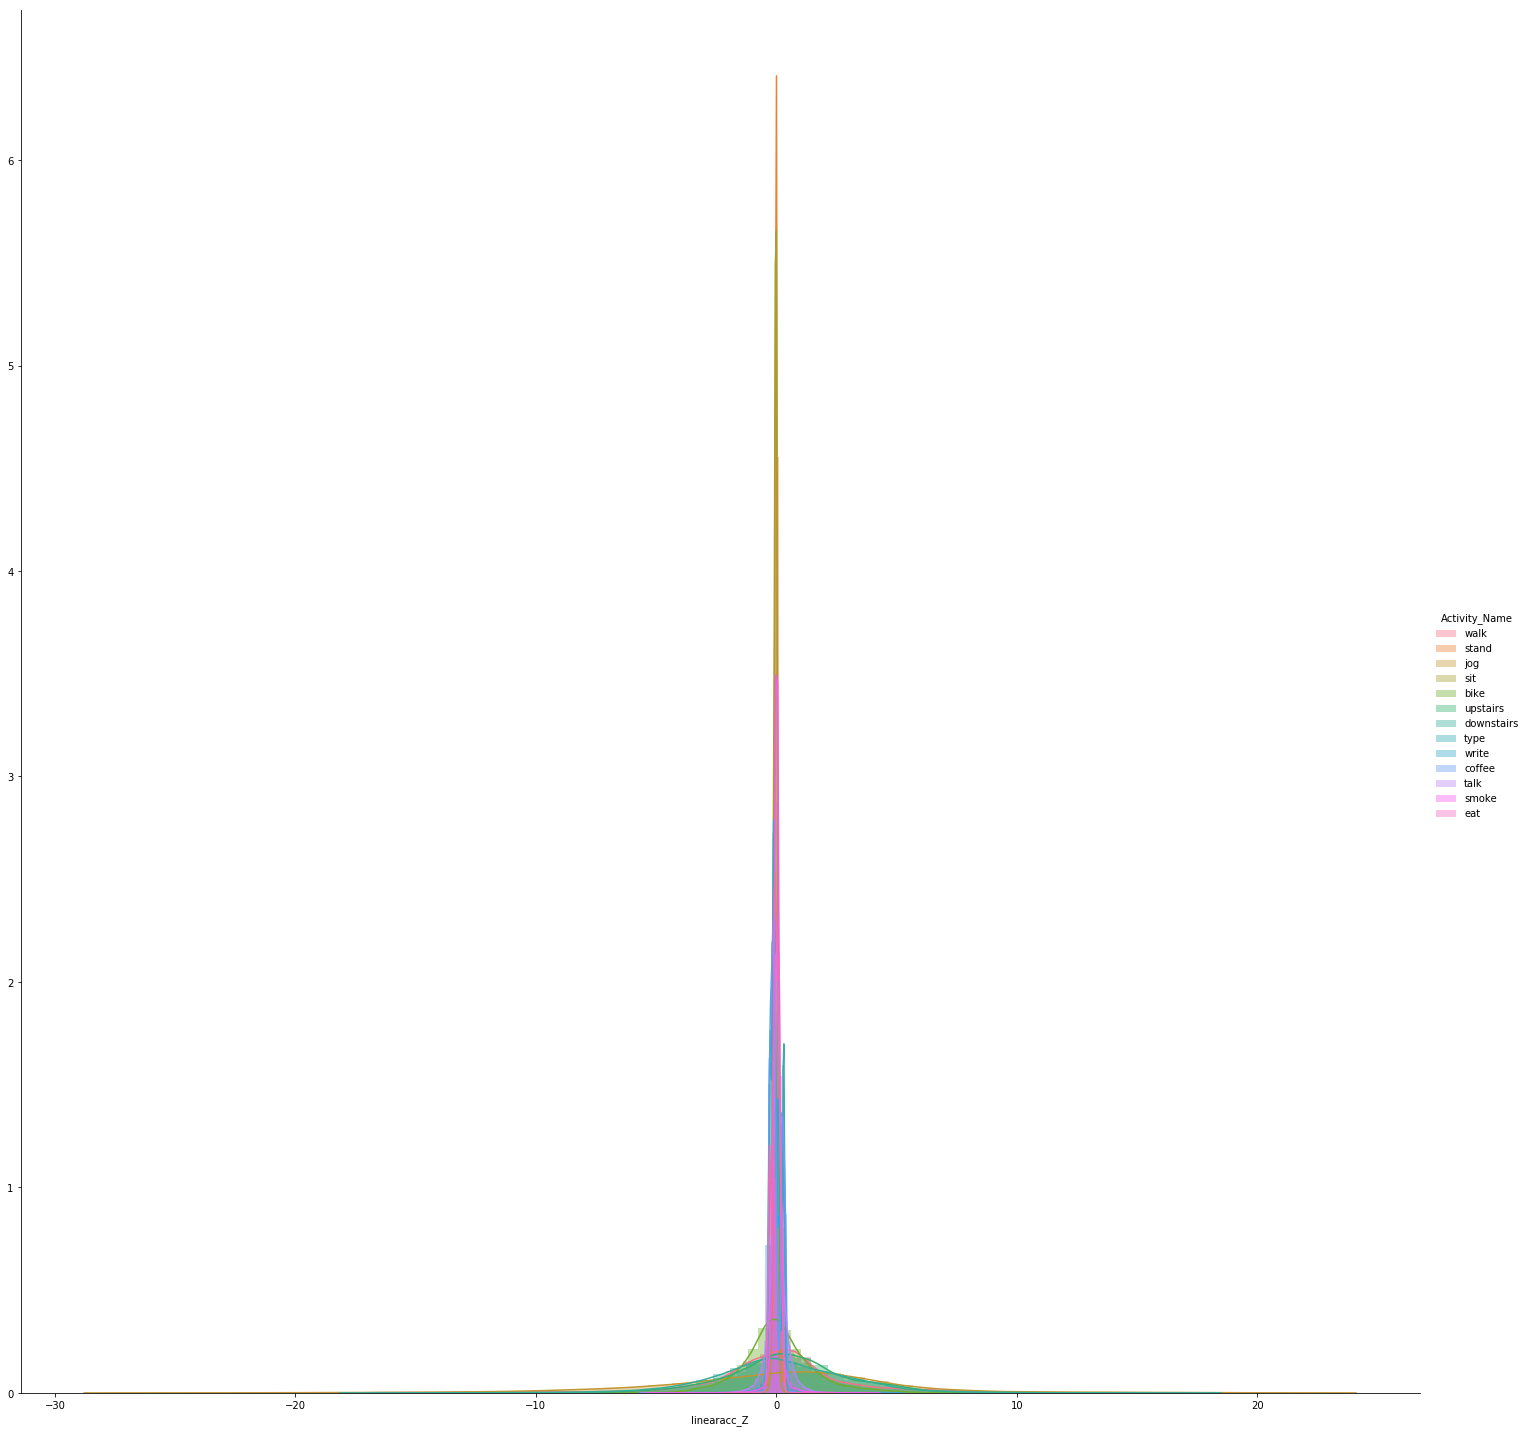

In [36]:
sns.FacetGrid(data, hue="Activity_Name", size=20) \
   .map(sns.distplot, "linearacc_Z") \
   .add_legend();
plt.show();


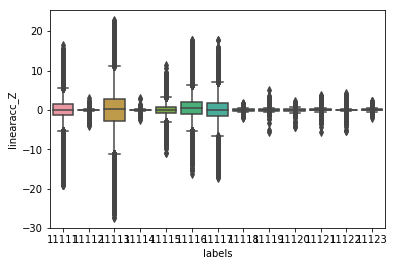

In [37]:
sns.boxplot(x='labels',y='linearacc_Z', data=data)
plt.show()

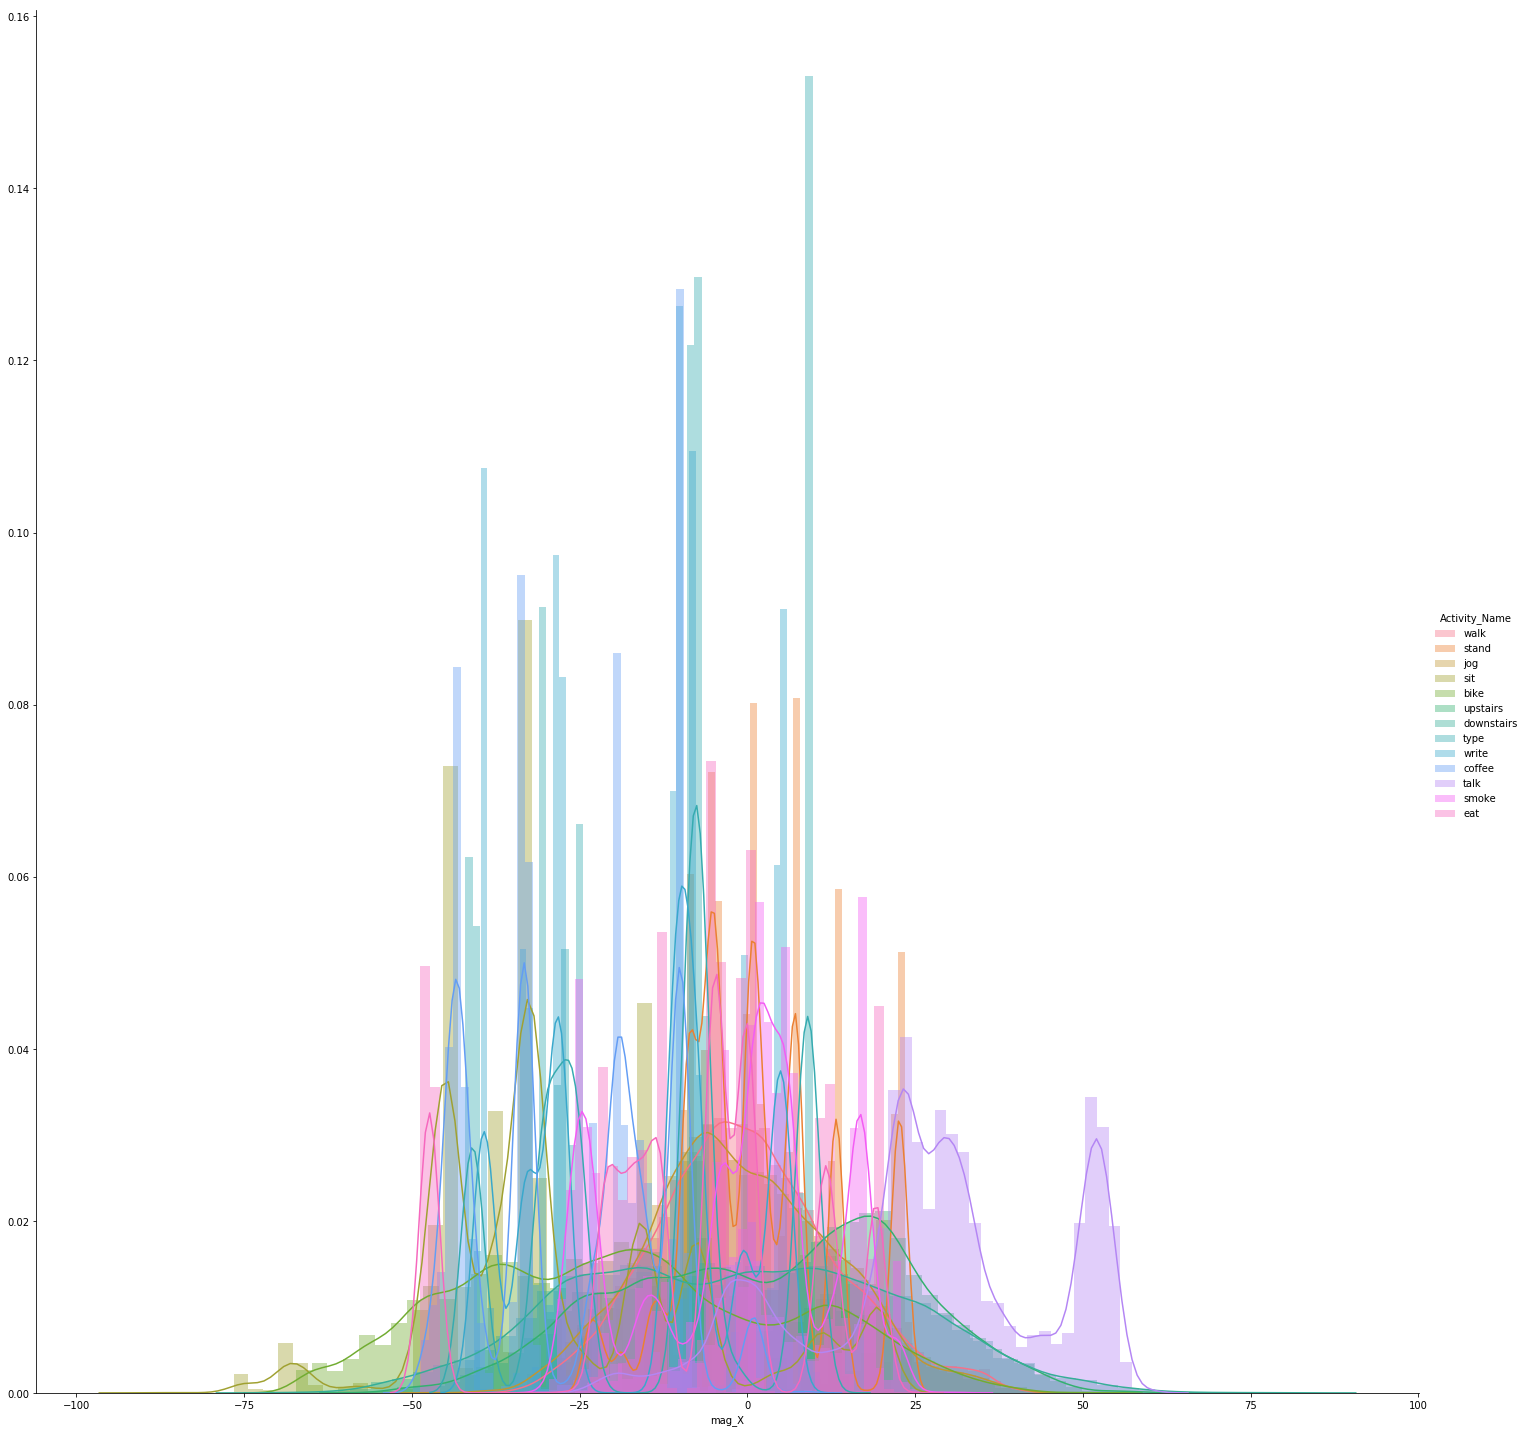

In [38]:
sns.FacetGrid(data, hue="Activity_Name", size=20) \
   .map(sns.distplot, "mag_X") \
   .add_legend();
plt.show();


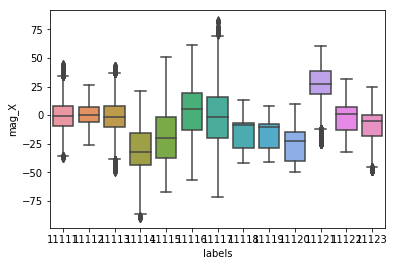

In [39]:
sns.boxplot(x='labels',y='mag_X', data=data)
plt.show()

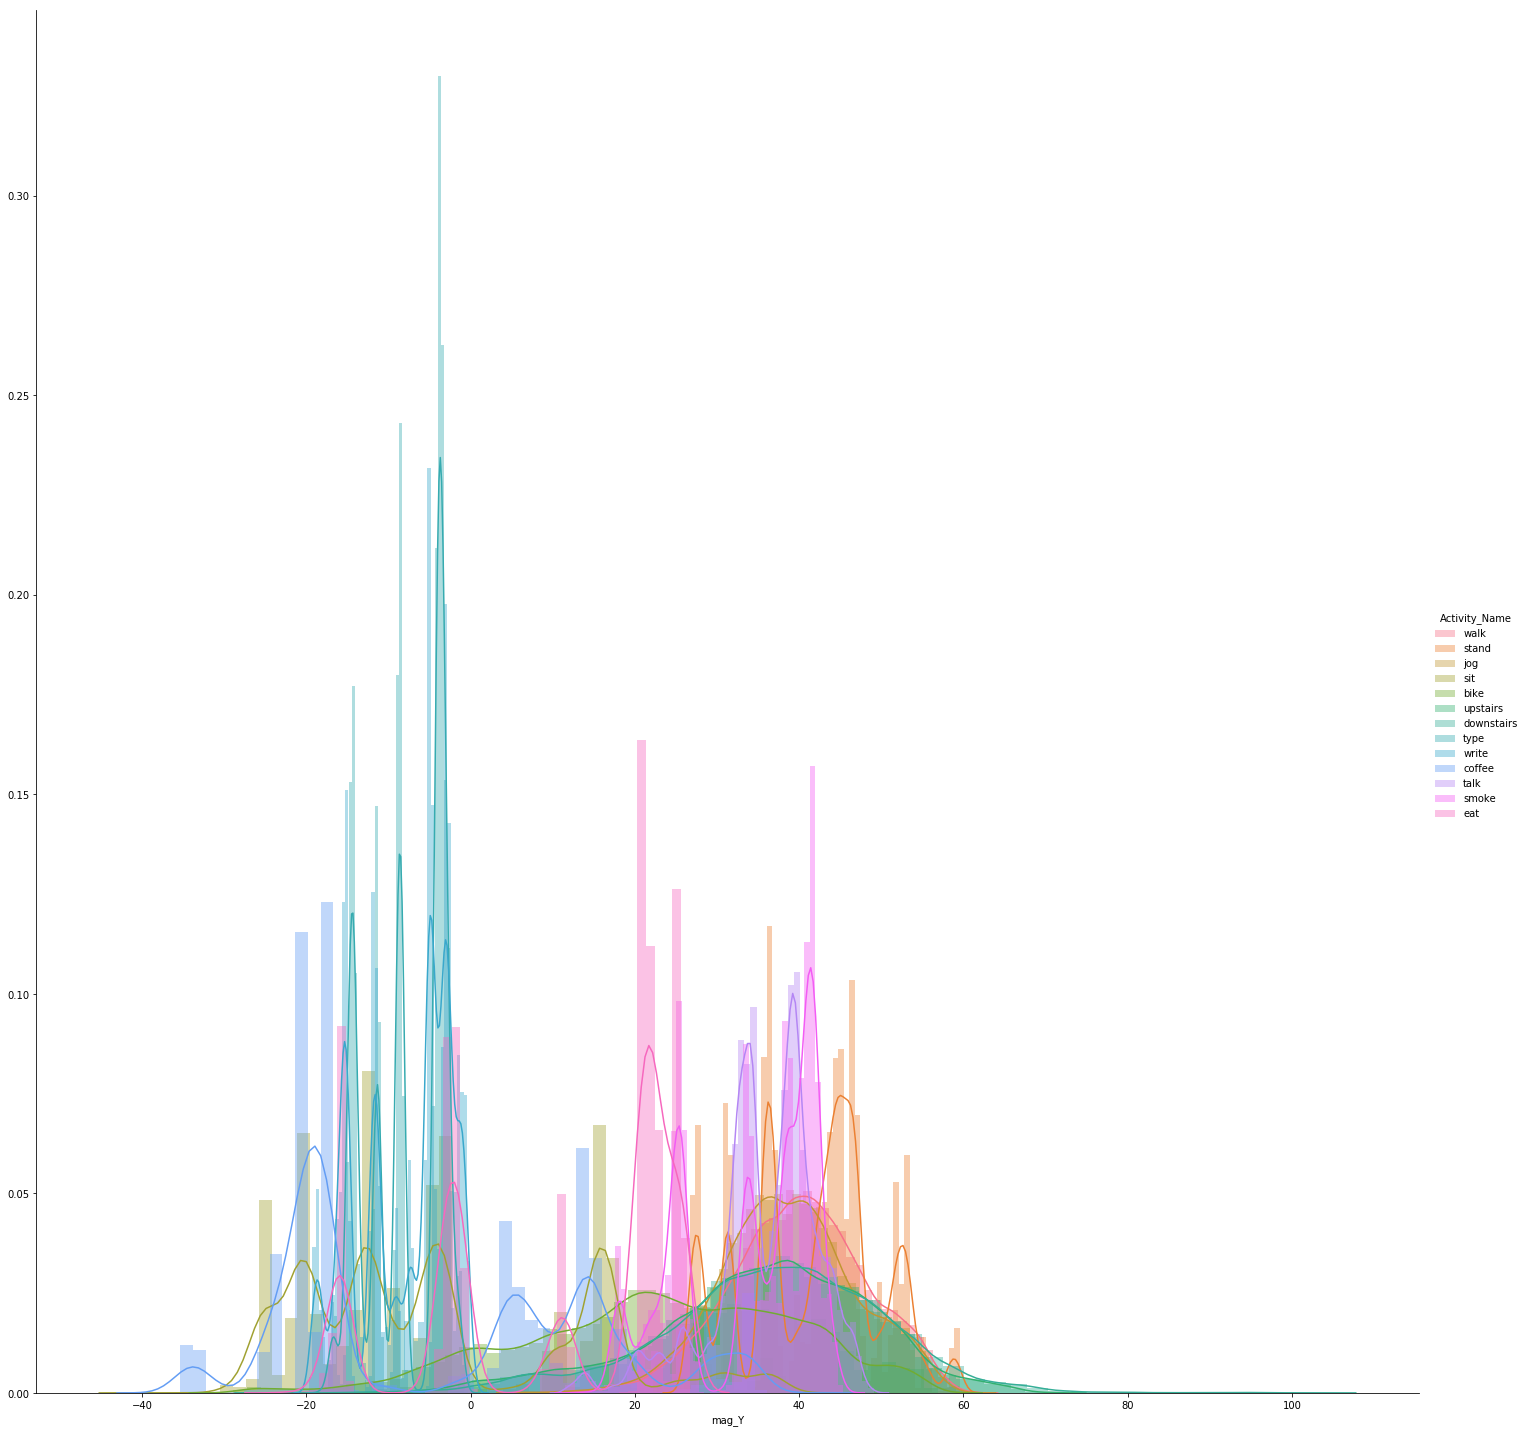

In [40]:
sns.FacetGrid(data, hue="Activity_Name", size=20) \
   .map(sns.distplot, "mag_Y") \
   .add_legend();
plt.show();


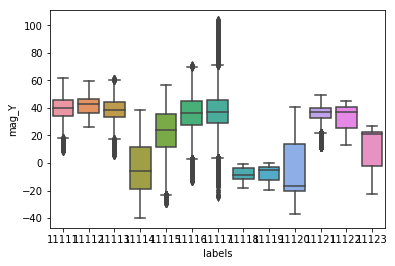

In [41]:
sns.boxplot(x='labels',y='mag_Y', data=data)
plt.show()

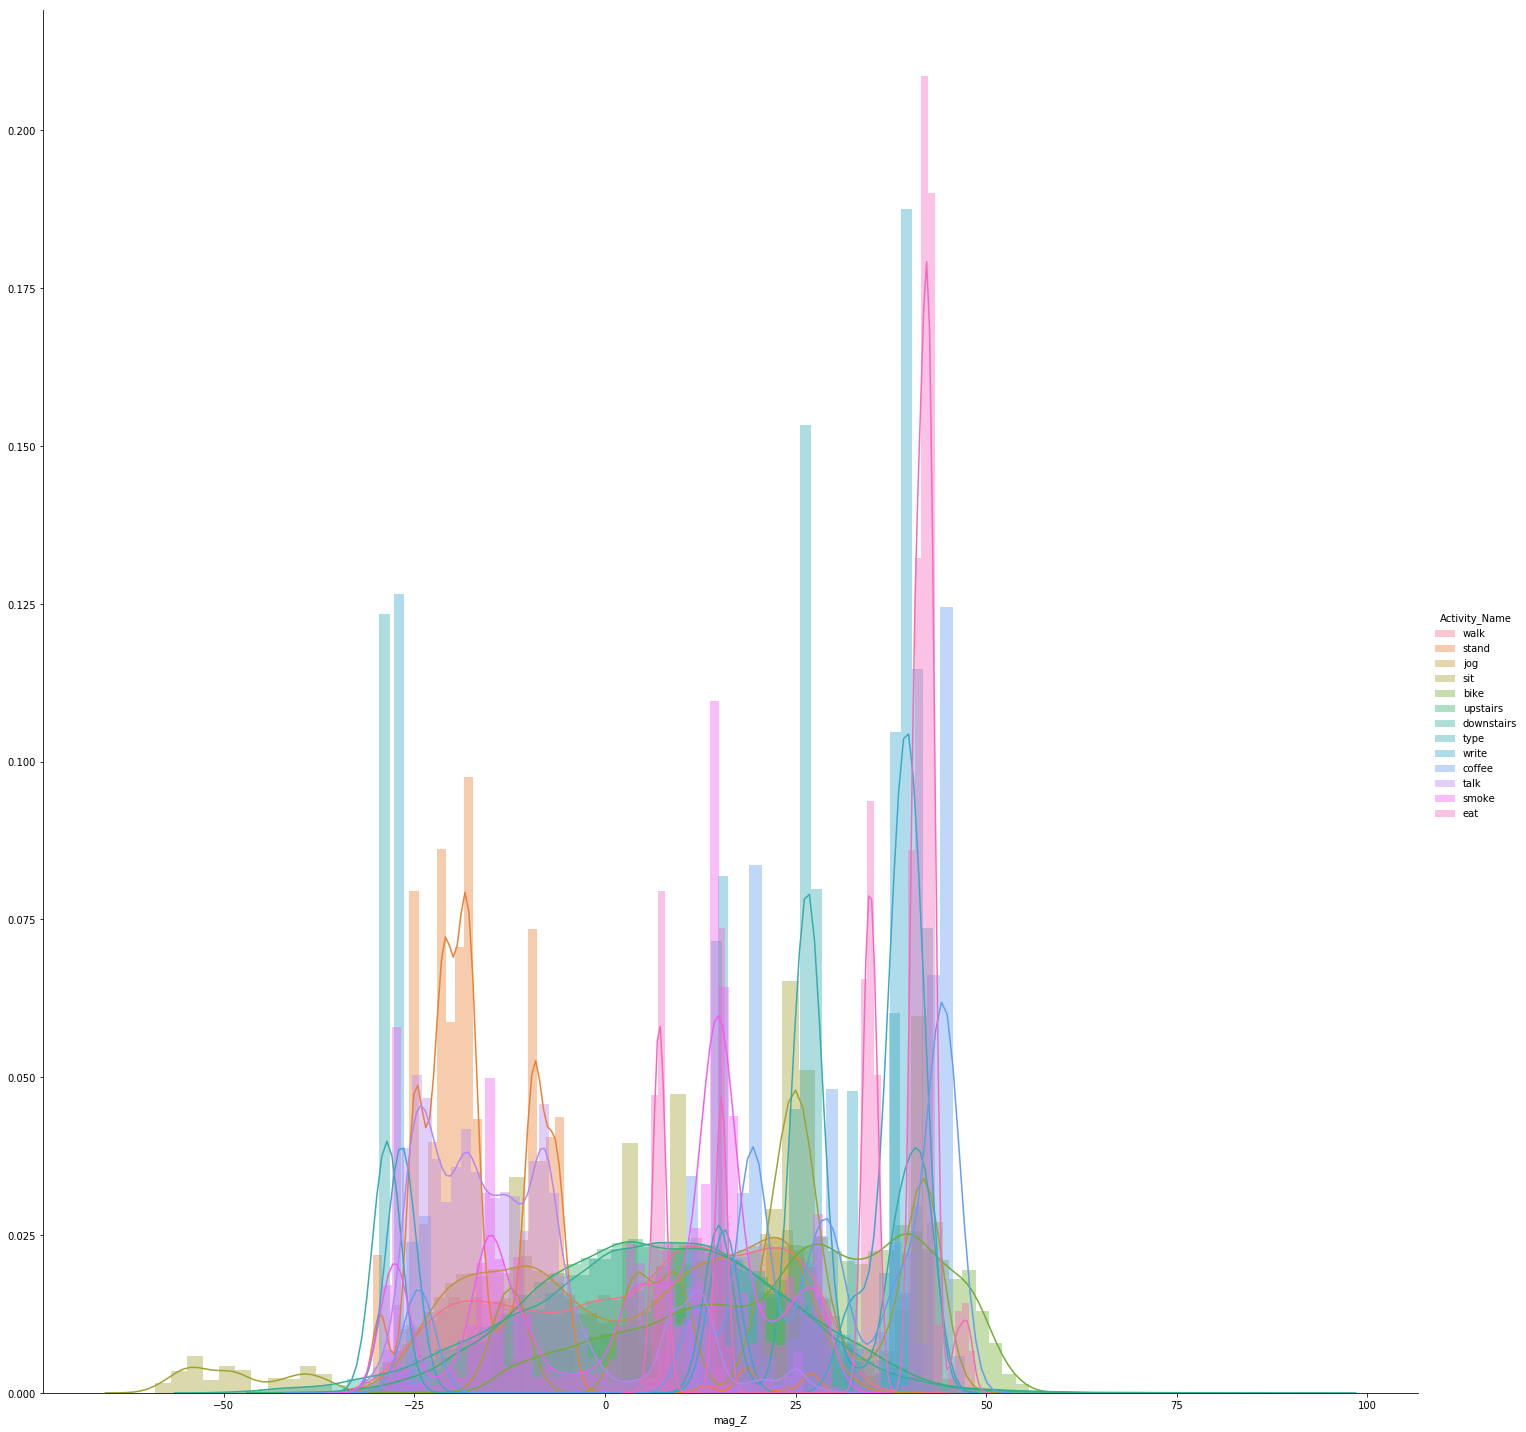

In [42]:
sns.FacetGrid(data, hue="Activity_Name", size=20) \
   .map(sns.distplot, "mag_Z") \
   .add_legend();
plt.show();


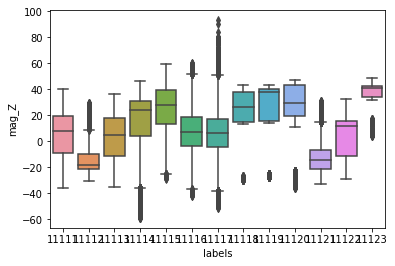

In [43]:
sns.boxplot(x='labels',y='mag_Z', data=data)
plt.show()

################################## END #############################